In [5]:
import tensorflow as tf
import keras
import keras.layers as klayers
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import shap

In [6]:
from faker import Faker
fake = Faker()
model_name = fake.first_name() + "_" + fake.word()
model_name

'Taylor_exactly'

In [7]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=f'./logs/{model_name}', histogram_freq=1)

In [8]:
dataset = "features_3_sec.csv"
df = pd.read_csv(dataset)
df.sample(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
5736,jazz.00074.4.wav,66149,0.325318,0.092289,0.104388,0.004895,2611.691412,620426.259003,2610.379785,352663.059000,...,32.073971,-1.577985,51.275414,-1.632489,63.702248,0.700930,111.889107,-0.155565,93.758308,jazz
9483,rock.00049.3.wav,66149,0.363431,0.074324,0.072403,0.000339,941.195138,38150.193508,1401.507375,35932.277540,...,28.675470,4.154313,32.935616,0.634441,29.192623,-4.701437,28.343163,-0.799645,24.695518,rock
235,blues.00023.5.wav,66149,0.283417,0.093394,0.086075,0.002643,1338.966802,65373.018941,1591.771291,83119.872075,...,60.521343,-3.990469,80.280876,-4.720143,40.641106,5.999785,54.167156,-2.976942,34.816139,blues
8974,reggae.00098.2.wav,66149,0.414623,0.091013,0.140329,0.001795,2088.398105,705324.308950,2487.751081,209289.864728,...,45.276478,-1.189113,35.149605,1.206006,37.243546,0.881598,36.713860,-3.894460,102.162392,reggae
25,blues.00002.5.wav,66149,0.364035,0.088116,0.152364,0.001923,1594.920885,260781.775496,1730.746723,113020.010243,...,36.222256,-10.064258,46.145531,-2.628009,53.689621,-2.401809,59.490814,-0.967632,32.147289,blues
3260,disco.00026.6.wav,66149,0.369232,0.086750,0.142597,0.001479,3313.453703,549514.125087,3061.689947,66615.625039,...,58.511292,-0.191126,84.919319,2.069692,108.203323,6.134819,82.644974,7.166585,60.776947,disco
9891,rock.00090.1.wav,66149,0.261564,0.093118,0.112408,0.000631,2707.808738,341565.742924,2397.881559,22494.748922,...,443.406708,19.882135,237.456940,20.580439,112.967407,-2.578947,171.911758,0.240802,227.216309,rock
2191,country.00019.6.wav,66149,0.297218,0.094253,0.068379,0.001009,1224.452686,194997.856105,1532.967427,66528.916613,...,28.769846,-14.032152,36.744625,-1.686228,32.161728,-4.681746,28.807940,-7.447006,71.923584,country
9614,rock.00062.4.wav,66149,0.332520,0.092267,0.062460,0.000568,2812.080267,931294.902451,3084.346982,175493.910982,...,47.784225,-10.945225,59.396801,-2.092337,108.146667,-2.096783,149.694641,-6.994097,93.775795,rock
1128,classical.00012.8.wav,66149,0.204846,0.086147,0.008439,0.000008,1542.581139,81696.272773,1558.304055,14425.407749,...,183.132385,8.680245,169.327469,-6.580857,74.848152,-8.834964,111.284103,2.577408,105.132675,classical


In [9]:
df.shape

(9990, 60)

In [10]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [11]:
df = df[[
    "label",
    "chroma_stft_mean",
    "rms_mean",
    "spectral_centroid_mean",
    "spectral_bandwidth_mean",
    "rolloff_mean",
    "zero_crossing_rate_mean",
    "harmony_mean",
    "perceptr_mean",
    "tempo",
    "mfcc1_mean",
    "mfcc2_mean",
    "mfcc3_mean",
    "mfcc4_mean",
    "mfcc5_mean",
]]


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chroma_stft_mean,9990.0,0.379534,0.090466,0.107108,0.315698,0.384741,0.442443,0.749481
rms_mean,9990.0,0.130859,0.068545,0.000953,0.083782,0.121253,0.176328,0.442567
spectral_centroid_mean,9990.0,2199.219431,751.860611,472.741636,1630.680158,2208.628236,2712.581884,5432.534406
spectral_bandwidth_mean,9990.0,2241.385959,543.854449,499.162910,1887.455790,2230.575595,2588.340505,3708.147554
rolloff_mean,9990.0,4566.076592,1642.065335,658.336276,3378.311110,4631.377892,5591.634521,9487.446477
zero_crossing_rate_mean,9990.0,0.102578,0.045651,0.013525,0.067290,0.097868,0.132749,0.347705
harmony_mean,9990.0,-0.000365,0.001699,-0.026672,-0.000127,-0.000013,0.000015,0.015688
perceptr_mean,9990.0,-0.000396,0.001108,-0.008794,-0.000579,-0.000056,0.000020,0.006819
tempo,9990.0,124.887709,32.911676,24.377211,103.359375,123.046875,143.554688,287.109375
mfcc1_mean,9990.0,-145.424643,106.456350,-662.171631,-201.474651,-120.118343,-69.897551,107.941315


In [13]:
for col in df.iloc[:,1:].columns:
    df[f"{col}_positive"] = (df[col] >= 0).astype(int)

In [14]:
X = df.iloc[:,1:].transform(abs)
y_raw = df.iloc[:,0]

In [15]:
le = LabelEncoder()
y = le.fit_transform(y_raw)
y_cat = keras.utils.to_categorical(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y_cat, random_state=42)

In [17]:
X_train

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,mfcc1_mean,...,rolloff_mean_positive,zero_crossing_rate_mean_positive,harmony_mean_positive,perceptr_mean_positive,tempo_positive,mfcc1_mean_positive,mfcc2_mean_positive,mfcc3_mean_positive,mfcc4_mean_positive,mfcc5_mean_positive
4721,0.434899,0.162669,2423.357375,2641.716773,4978.145282,0.103504,0.000016,0.000101,99.384014,138.379593,...,1,1,0,1,1,0,1,0,1,1
118,0.348643,0.073866,1380.074475,1837.308840,3133.743615,0.036974,0.000077,0.000035,89.102909,278.889069,...,1,1,1,0,1,0,1,0,1,1
2022,0.270834,0.156919,2021.217893,2327.972352,4304.073205,0.073821,0.000213,0.001167,161.499023,118.688309,...,1,1,0,0,1,0,1,0,1,1
9875,0.394370,0.069616,2464.323453,2114.655580,4842.320463,0.137943,0.001780,0.001176,92.285156,142.302673,...,1,1,0,0,1,0,1,0,1,0
5431,0.323400,0.100702,1928.172392,2021.388903,3983.311298,0.074170,0.001004,0.001104,143.554688,157.545807,...,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.267750,0.097862,2383.639867,2562.185167,5218.406137,0.079286,0.000028,0.000019,83.354335,179.116684,...,1,1,0,1,1,0,1,0,1,0
5191,0.248258,0.041260,1393.173520,1860.369053,2993.198054,0.048622,0.000033,0.000335,172.265625,278.396637,...,1,1,1,1,1,0,1,0,1,1
5390,0.240019,0.083758,1204.024837,1388.025813,2453.625676,0.074020,0.000152,0.001017,99.384014,260.919403,...,1,1,0,0,1,0,1,0,1,0
860,0.365543,0.108228,1511.812830,1781.554997,2899.280161,0.072761,0.000011,0.000049,123.046875,212.680618,...,1,1,1,0,1,0,1,1,1,1


In [569]:
num_categories = y.max() + 1

random_init = keras.initializers.RandomNormal()

model = keras.models.Sequential([
    klayers.Input(shape=X_train.shape[1] ,name="Input_Layer"),
    klayers.Dense(units=256, activation="relu", name="Layer_1"),
    klayers.Dense(units=1000, activation="relu", name="Layer_2"),
    klayers.Dropout(rate=0.3, name="Dropout_Layer_2"),
    klayers.Dense(units=500, activation="relu", name="Layer_3"),
    klayers.Dropout(rate=0.6, name="Dropout_Layer_3"),
    klayers.Dense(units=1000, activation="relu", name="Layer_4"),
    klayers.Dropout(rate=0.5, name="Dropout_Layer_4"),
    klayers.Dense(units=num_categories, activation='softmax', name="Output_Layer")
])

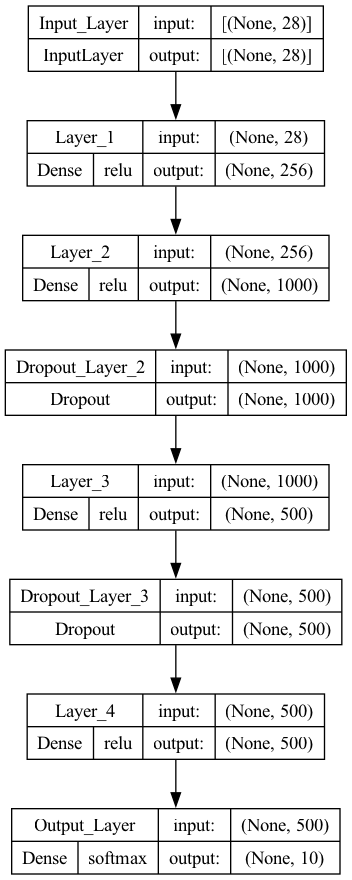

In [570]:
keras.utils.plot_model(model, to_file=f'./models/{model_name}.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [571]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 256)               7424      
                                                                 
 Layer_2 (Dense)             (None, 1000)              257000    
                                                                 
 Dropout_Layer_2 (Dropout)   (None, 1000)              0         
                                                                 
 Layer_3 (Dense)             (None, 500)               500500    
                                                                 
 Dropout_Layer_3 (Dropout)   (None, 500)               0         
                                                                 
 Layer_4 (Dense)             (None, 500)               250500    
                                                                 
 Output_Layer (Dense)        (None, 10)              

In [572]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',keras.metrics.AUC(name="auc")])

In [573]:
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=150)

In [574]:
batch_size = 100

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=10000).batch(batch_size).repeat()

In [575]:
model.fit(
    dataset,
    epochs = 1000,
    batch_size = batch_size,
    validation_data = (X_test, y_test),
    steps_per_epoch = min(df.shape[0] // batch_size, 100),
    verbose = 3,
    callbacks = [tensorboard_callback, early_stopping_callback]
)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

In [576]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 1ms/step - loss: 1.1525 - accuracy: 0.6717 - auc: 0.9368


[1.152452826499939, 0.6717373728752136, 0.9368168711662292]

In [580]:
model.save(f"./nn/{model_name}.keras", "keras")

# Load Model

In [18]:
model_r = keras.models.load_model(f"./nn/James_guy.keras") 

# SHAP Values

In [28]:
shap.initjs()

In [19]:
explainer = shap.KernelExplainer(model_r, X_train.iloc[:50,:])

In [32]:
shap_values = explainer.shap_values(X_train.iloc[20,:], nsamples=500)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_train.iloc[20,:])

In [30]:
shap_values50 = explainer.shap_values(X_train.iloc[50:100,:], nsamples=500)
shap.force_plot(explainer.expected_value[0], shap_values50[0], X_train.iloc[50:100,:])


100%|██████████| 50/50 [01:12<00:00,  1.45s/it]
